In [1]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=200,fontsize=10):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

In [2]:
n = 100
G = 1
eps = 0
a = 1
M = 1
nsteps = 1000
atol = 1e-3

df = PyCC.Distributions.Plummer(n,a,M,G)
particle_mass = df.loc[:,"mass"][0]

runs = {"f8":{},"f4":{},"f4gpu":{}}

In [3]:
for precision in runs.keys():
    accelerate = False
    if "gpu" in precision:
        accelerate = True

    print(precision[:2],accelerate)

    dt,tol = PyCC.find_timestep(df,1/64,atol=atol,eps=0,G=1,precision=precision[:2],accelerate=accelerate)
    print("dt =",dt,"tol =",tol)
    runs[precision]["dt"] = dt
    runs[precision]["tol"] = tol

f8 False
dt = 0.015625 tol = 2.165366984149819e-06
f4 False
dt = 0.015625 tol = 2.1755695e-06
f4 True
dt = 0.015625 tol = 2.168119e-06


In [4]:
for precision in runs.keys():
    accelerate = False
    if "gpu" in precision:
        accelerate = True
    print(precision,accelerate)
    out,stats = PyCC.evaluate(df,steps=nsteps,eps=eps,G=G,dt = runs[precision]["dt"],precision=precision[:2],accelerate=accelerate)
    runs[precision]["out"] = PyCC.outdf2numpy(out)
    

f8 False
f4 False
f4gpu True


In [5]:
for precision in runs.keys():
    vel = runs[precision]["out"]["vel"]
    gpe = runs[precision]["out"]["gpe"]

    speeds = np.linalg.norm(vel,axis=2)
    kes = (0.5) * particle_mass * (speeds**2)
    ke_tot = np.sum(kes,axis=1)

    gpe_tot = np.sum(gpe,axis=1).flatten()/2

    runs[precision]["ke"] = ke_tot
    runs[precision]["gpe"] = gpe_tot
    runs[precision]["e_tot"] = ke_tot + gpe_tot

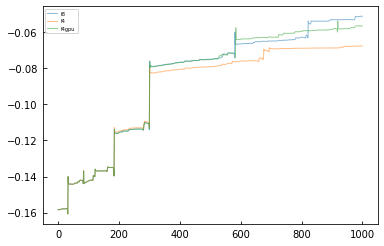

In [6]:
for precision in runs.keys():
    plt.plot((runs[precision]["e_tot"]),label=precision,alpha=0.5,linewidth=1)

plt.legend()
plt.show()

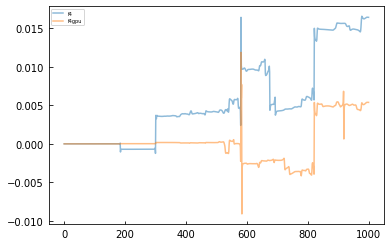

In [7]:

plt.plot((runs["f8"]["e_tot"] - runs["f4"]["e_tot"]),label="f4",alpha=0.5)
plt.plot((runs["f8"]["e_tot"] - runs["f4gpu"]["e_tot"]),label="f4gpu",alpha=0.5)


plt.legend()
plt.show()